In [1]:
pip install ultralytics


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob

In [3]:
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Using torch 2.3.1+cpu (CPU)


In [10]:
images_path = "colorful_fashion_dataset_for_object_detection\\JPEGImages\\"
annotations_path  = "colorful_fashion_dataset_for_object_detection\\Annotations_txt\\"
path = 'colorful_fashion_dataset_for_object_detection'

In [6]:
from ultralytics import YOLO

# load pre-trained model
detection_model = YOLO("yolov8m.pt")

100%|█████████████████████████████████████████████████████████████████████████████| 49.7M/49.7M [00:15<00:00, 3.43MB/s]


WARNING  'line_thickness' is deprecated and will be removed in in the future. Please use 'line_width' instead.
WARNING  'hide_labels' is deprecated and will be removed in in the future. Please use 'show_labels' instead.

Found https://i.stack.imgur.com/GRdCC.jpg locally at GRdCC.jpg
image 1/1 C:\Users\navya\Documents\Everything\Skills_development\Go_projects\Myntra hackerramp\datasets\colorfulfashion\GRdCC.jpg: 448x640 1 person, 1 bicycle, 5 cars, 1 truck, 1000.4ms
Speed: 6.7ms preprocess, 1000.4ms inference, 9.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict


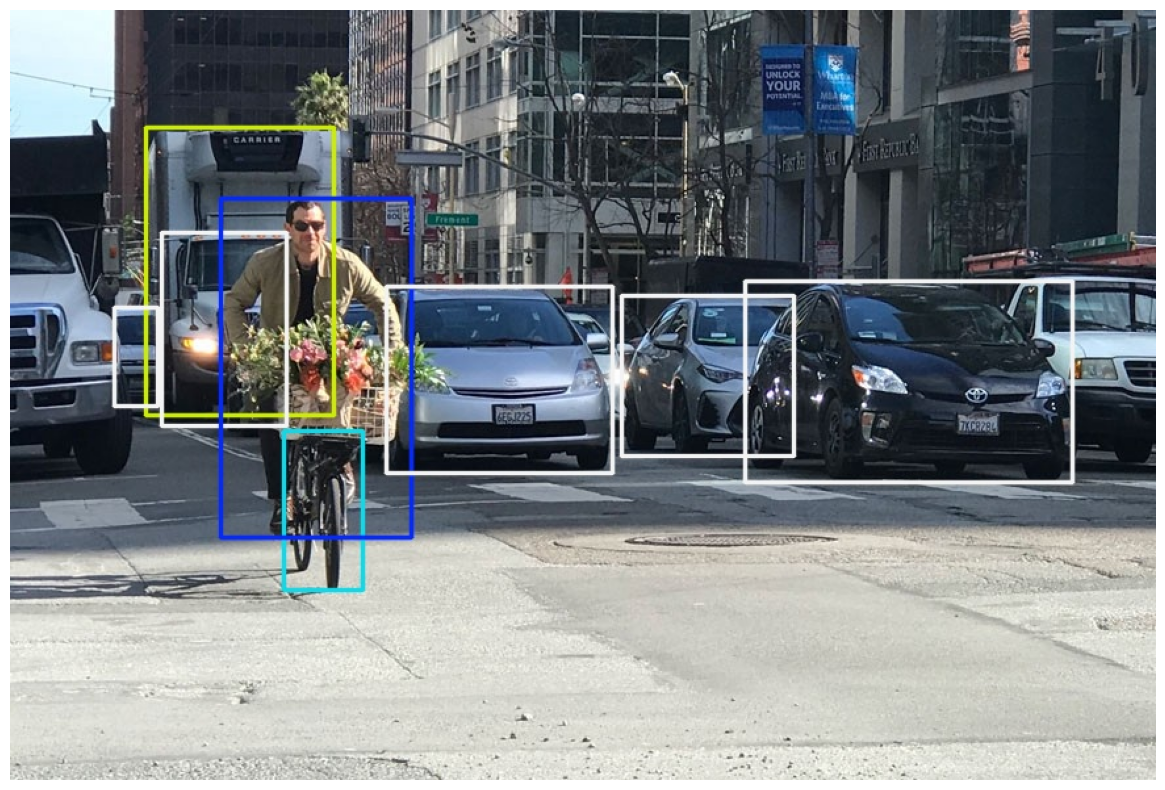

In [14]:
img = random.choice(os.listdir(images_path))

i=detection_model.predict(source='https://i.stack.imgur.com/GRdCC.jpg', conf=0.5, save=True, line_thickness=2, hide_labels=False)

im = plt.imread('runs/detect/predict/GRdCC.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(im)

In [8]:
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)

    return (box)

def plot_annotations(img, filename):
    with open(annotations_path+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])
            
            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0])),int(round(bb[2]))),(int(round(bb[1])),int(round(bb[3]))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

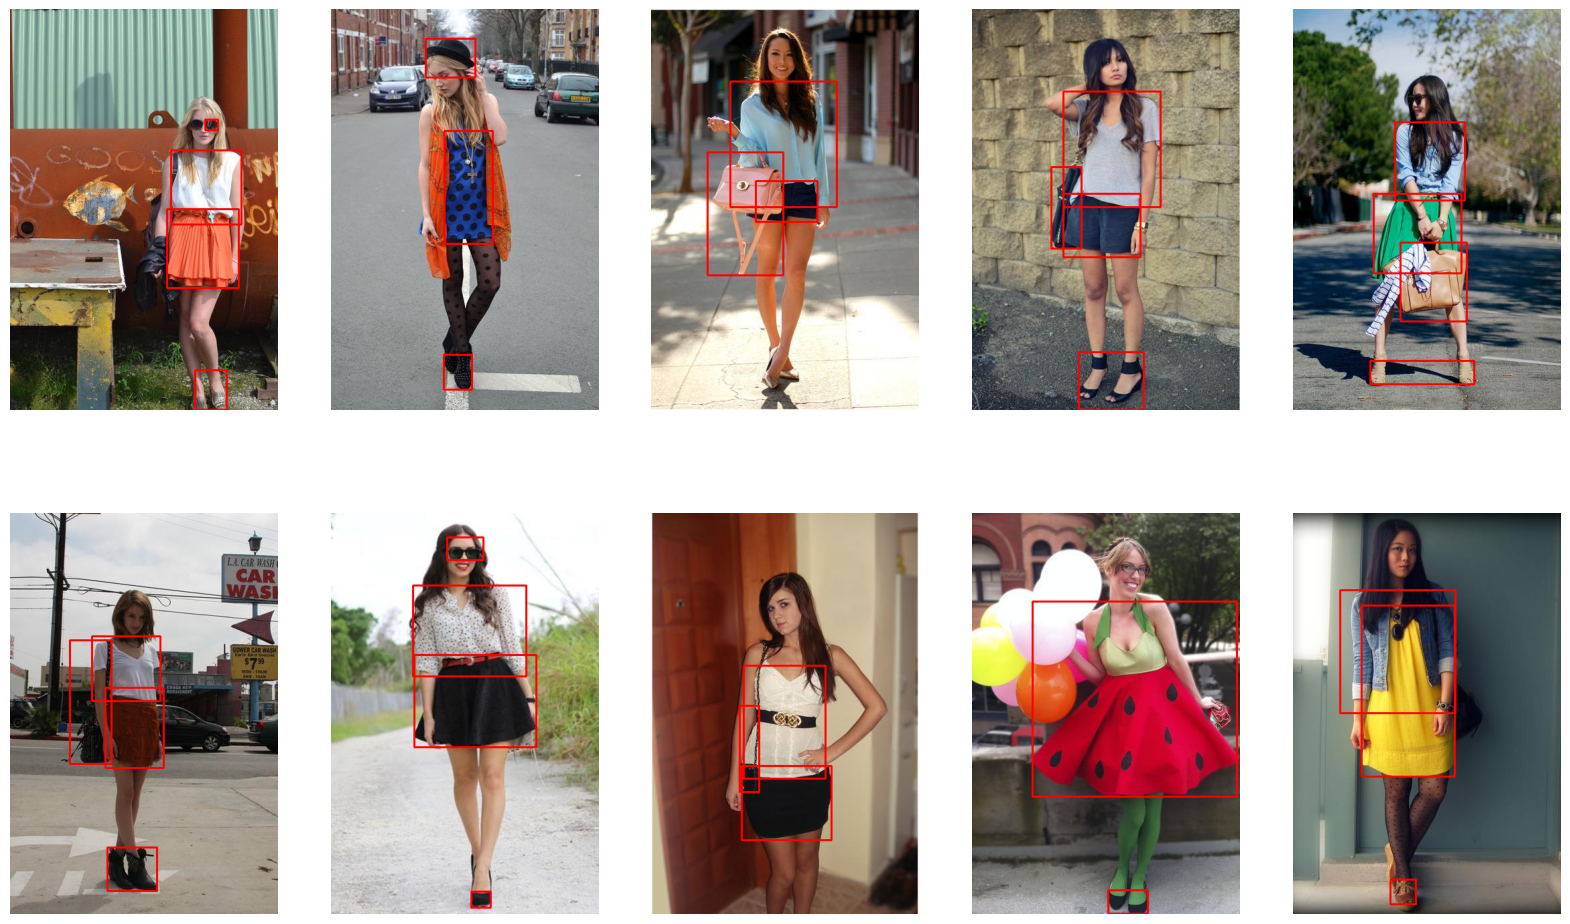

In [11]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(20,12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(images_path+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

In [12]:
train = []
with open(path+'/ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'/ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [13]:
len(train), len(test)

(2145, 537)

In [15]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [16]:
train_path = 'train/'
test_path = 'test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████████████████████████████████████████████████████████████████████████| 2145/2145 [00:29<00:00, 71.54it/s]


Copying Test Data..!!


100%|████████████████████████████████████████████████████████████████████████████████| 537/537 [00:07<00:00, 72.69it/s]


In [21]:
text = """
train: colorfulfashion/train
val: colorfulfashion/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [22]:
model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=5)

New https://pypi.org/project/ultralytics/8.2.56 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.55  Python-3.11.5 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i5-1155G7 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning C:\Users\navya\Documents\Everything\Skills_development\Go_projects\Myntra hackerramp\datasets\colorfulf


train: New cache created: C:\Users\navya\Documents\Everything\Skills_development\Go_projects\Myntra hackerramp\datasets\colorfulfashion\train\labels.cache


val: Scanning C:\Users\navya\Documents\Everything\Skills_development\Go_projects\Myntra hackerramp\datasets\colorfulfas


val: New cache created: C:\Users\navya\Documents\Everything\Skills_development\Go_projects\Myntra hackerramp\datasets\colorfulfashion\test\labels.cache
Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.302      1.824      1.406         16        640: 100%|██████████| 135/135 [2:40:39<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [09:35

                   all        537       2035      0.668      0.713      0.705      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.255      1.226      1.371          6        640: 100%|██████████| 135/135 [2:52:35<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [07:12

                   all        537       2035      0.694      0.646      0.705      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.238      1.141      1.356          4        640: 100%|██████████| 135/135 [2:31:54<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [08:38

                   all        537       2035      0.633       0.73      0.715      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.176      1.047      1.335          5        640: 100%|██████████| 135/135 [2:18:02<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [08:11

                   all        537       2035      0.731       0.74      0.757      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G       1.12     0.9298       1.28          8        640: 100%|██████████| 135/135 [2:09:44<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [07:59

                   all        537       2035       0.75      0.752      0.779      0.528



5 epochs completed in 13.258 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 52.0MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.2.55  Python-3.11.5 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i5-1155G7 2.50GHz)
Model summary (fused): 218 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [07:27


                   all        537       2035       0.75      0.752      0.779      0.528
              sunglass         82         82      0.832     0.0604      0.314      0.111
                   hat         77         77      0.716      0.817      0.789      0.482
                jacket        179        181      0.752      0.823      0.856      0.662
                 shirt        361        366        0.8      0.836      0.832      0.578
                 pants        114        114      0.709      0.939      0.936      0.722
                shorts        107        107      0.784      0.822      0.808      0.528
                 skirt        186        186      0.759       0.83      0.818      0.635
                 dress        128        128      0.642      0.852      0.828      0.644
                   bag        274        274      0.708      0.745       0.78      0.443
                  shoe        520        520      0.803      0.797      0.825      0.476
Speed: 3.6ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001AA147053D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,   

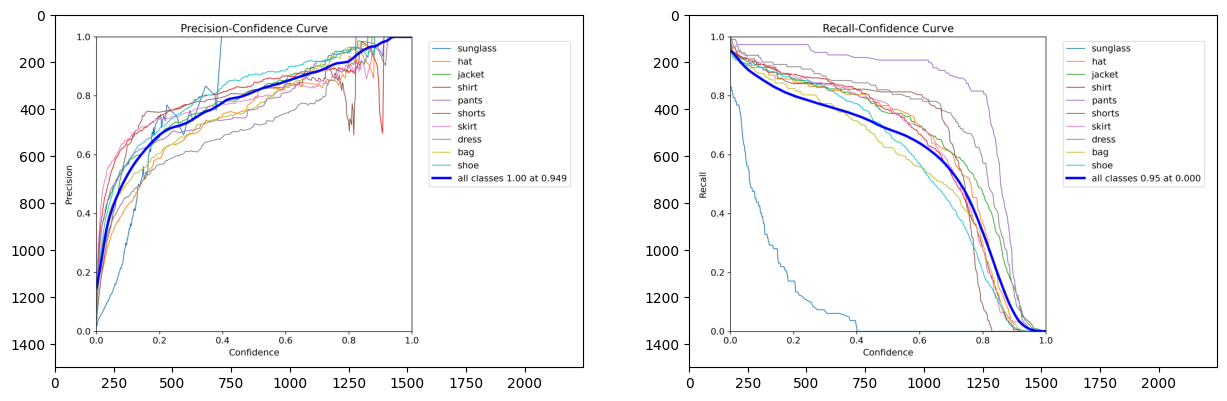

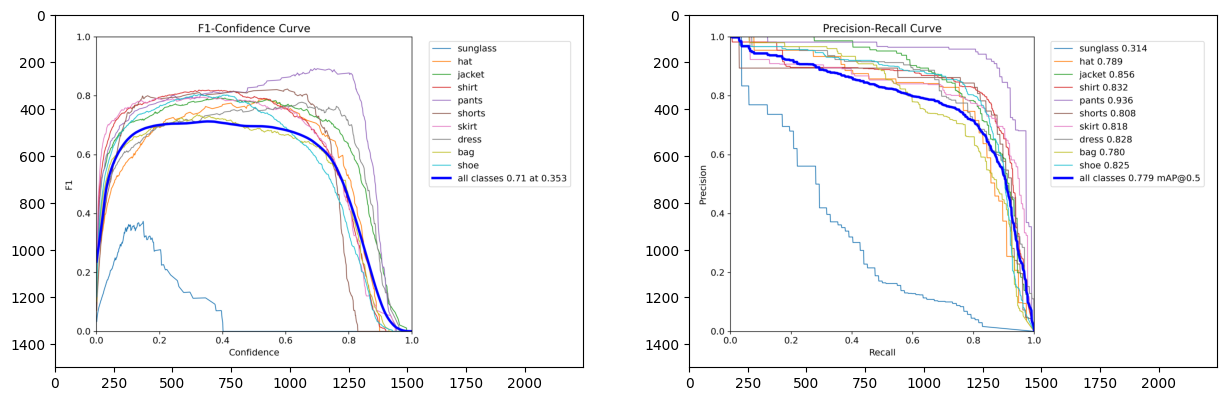

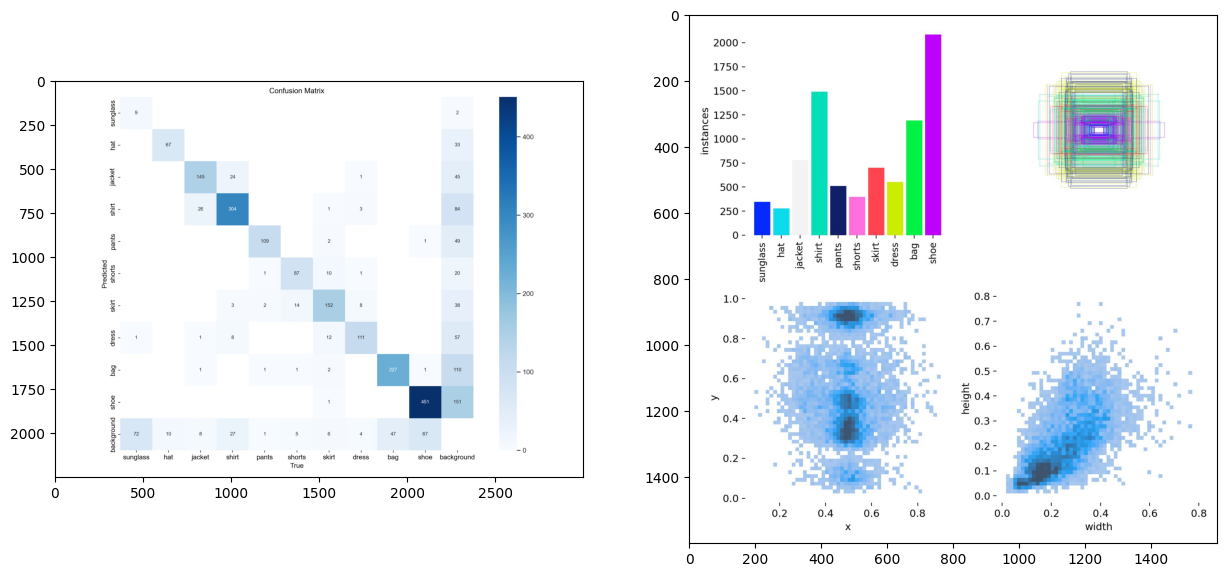

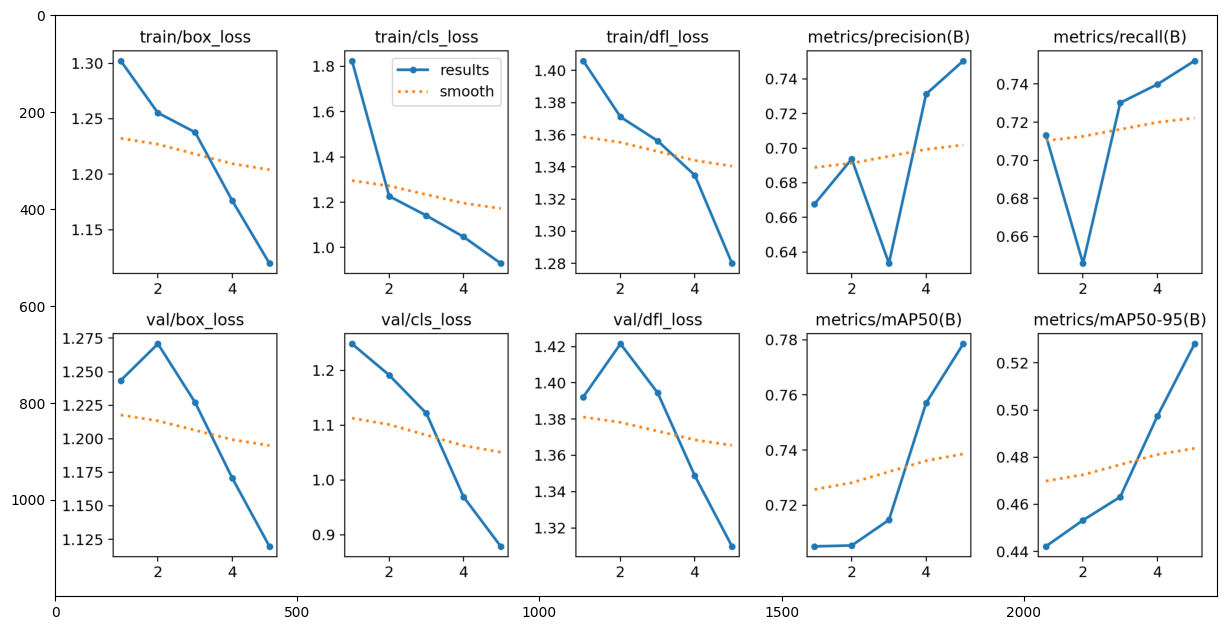

In [23]:
%matplotlib inline
model_path = 'runs/detect/train3/'

def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

plot(['P_curve.png','R_curve.png'], (1,2))
plot(['F1_curve.png','PR_curve.png'], (1,2))
plot(['confusion_matrix.png','labels.jpg'], (1,2))
plot(['results.png'],(1,1))

WARNING  'line_thickness' is deprecated and will be removed in in the future. Please use 'line_width' instead.

image 1/1 C:\Users\navya\Documents\Everything\Skills_development\Go_projects\Myntra hackerramp\datasets\colorfulfashion\colorful_fashion_dataset_for_object_detection\JPEGImages\167119.jpg: 640x448 1 shirt, 1 skirt, 1 shoe, 480.8ms
Speed: 3.0ms preprocess, 480.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\detect\train39
WARNING  'line_thickness' is deprecated and will be removed in in the future. Please use 'line_width' instead.

image 1/1 C:\Users\navya\Documents\Everything\Skills_development\Go_projects\Myntra hackerramp\datasets\colorfulfashion\colorful_fashion_dataset_for_object_detection\JPEGImages\179874.jpg: 640x448 1 shirt, 1 skirt, 1 shoe, 425.1ms
Speed: 4.3ms preprocess, 425.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\detect\train310
WARNING  'line_thickness' is deprecated and

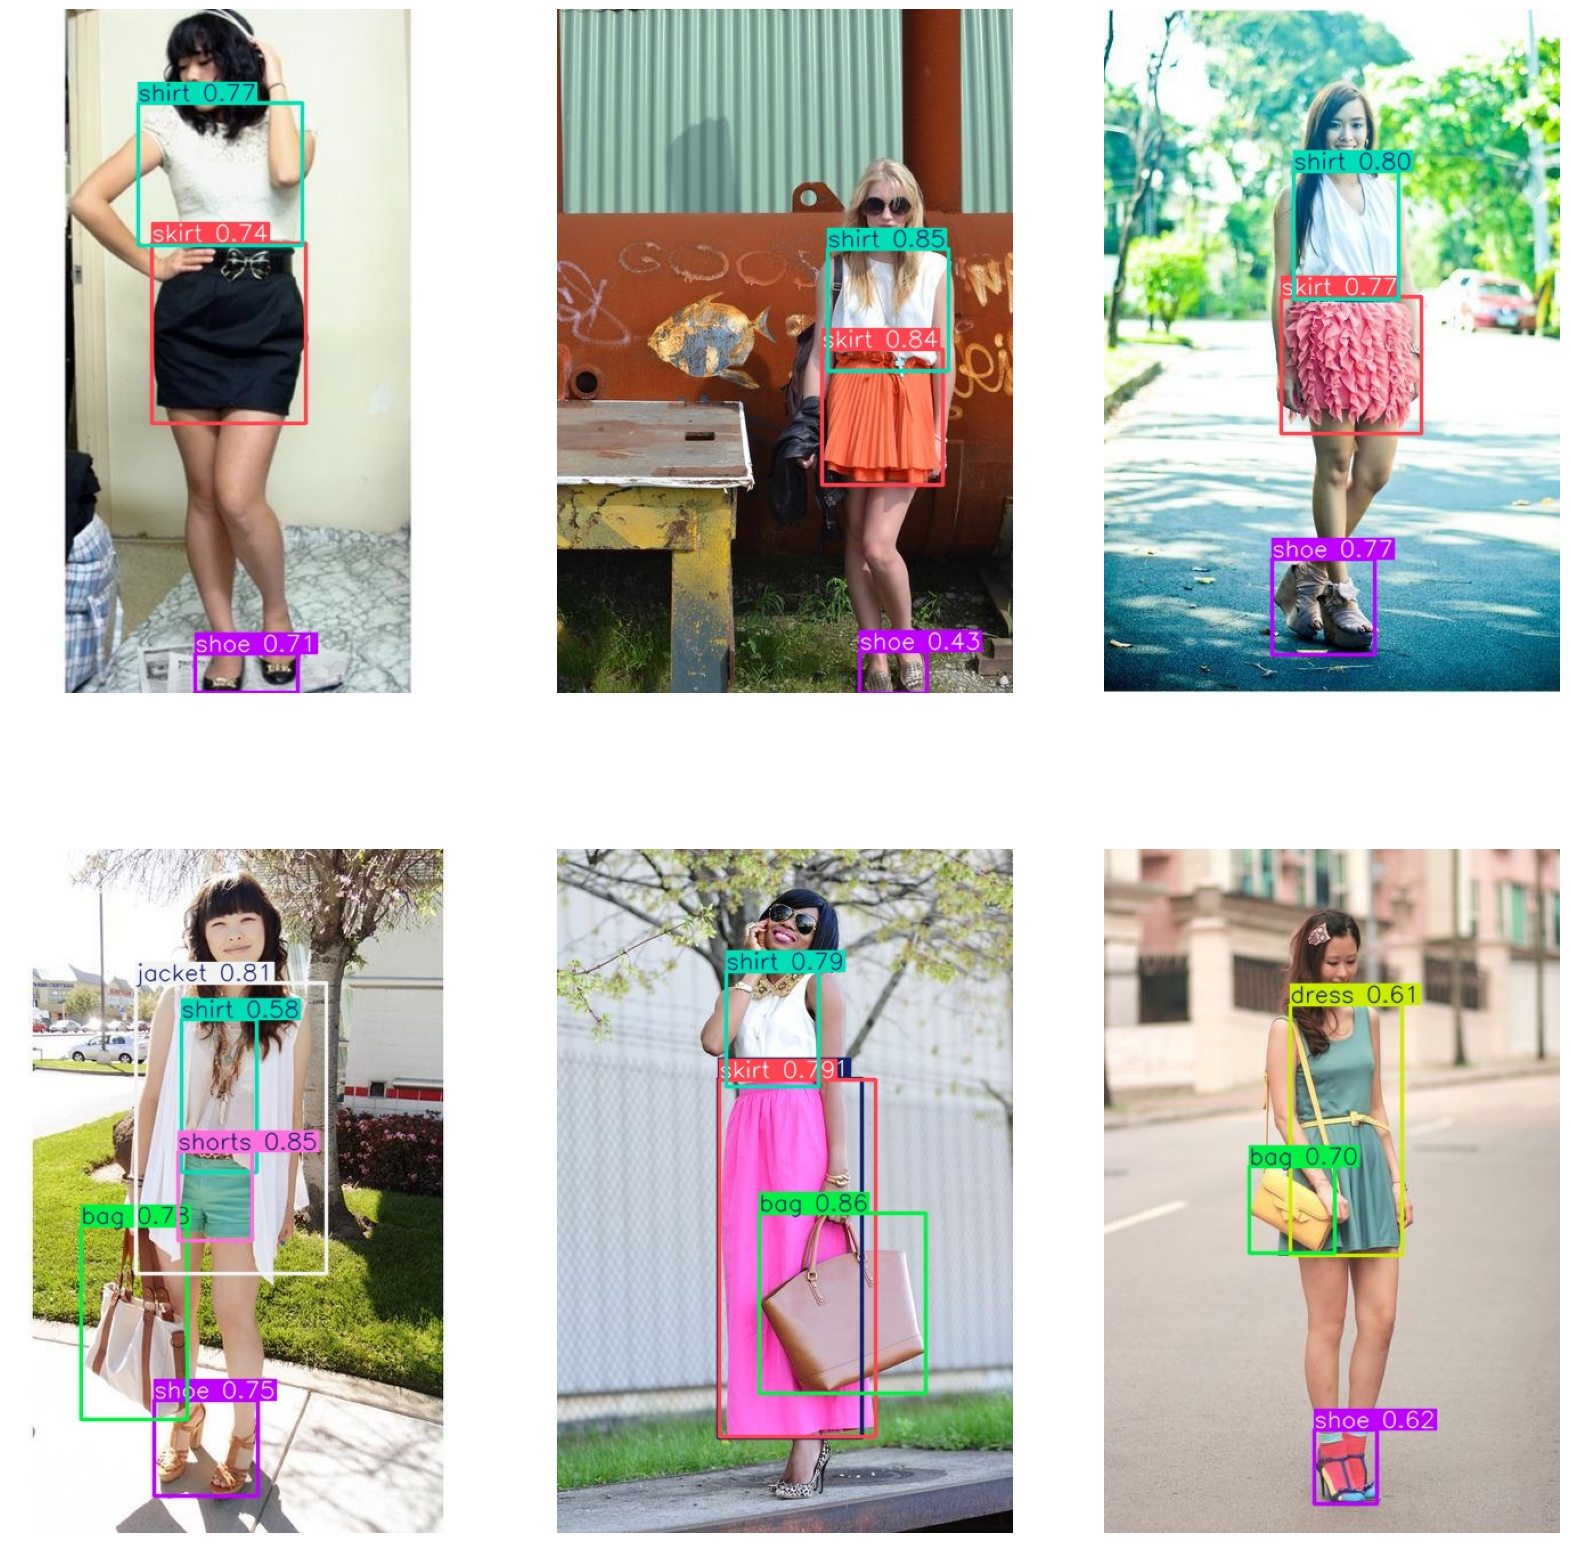

In [30]:
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 6)
output_base_path = "runs//detect//"
c=1
for img in imgs:
    i=model.predict(source=images_path+img, conf=0.4, save=True, line_thickness=2)
    sub_dirs = [d for d in os.listdir(output_base_path) if os.path.isdir(os.path.join(output_base_path, d))]
    latest_dir = max(sub_dirs, key=lambda d: os.path.getmtime(os.path.join(output_base_path, d)))
    im = plt.imread(os.path.join(output_base_path, latest_dir, img))
    plt.subplot(2,3,c)
    plt.axis('off')
    plt.imshow(im)
    c+=1